In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_excel("Yahoo-Finance-Scrape-2021-05-14.xlsx")

In [36]:
df.columns
df.columns = df.columns.str.replace(' ', '_')
#df.head(10)

In [37]:
#How to Calculate the Current Ratio? Typically, a company's current ratio is computed by dividing its total current assets by its total current liabilities
#air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
df["current_ratio"]=df['Total_current_assets']/df['Total_current_liabilities']


In [38]:
#The debt-to-equity (D/E) ratio is used to evaluate a company's financial leverage and is calculated by dividing a company’s total liabilities by its shareholder equity.
df['debt_to_equity_ratio']=df['Total_liabilities']/df["Total_stockholders'_equity"]
df.head(1)

,Unnamed:_0,index,Symbol,Date,Cash_and_cash_equivalents,Other_short-term_investments,Total_cash,Net_receivables,Inventory,Other_current_assets,...,Cash_at_beginning_of_period,Cash_at_end_of_period,Operating_cash_flow,Capital_expenditure,Free_cash_flow,Stock-based_compensation,Deferred_revenues,Research_development,current_ratio,debt_to_equity_ratio
0,0,31/3/2020,20MICRONS,31/3/2020,61057.0,14677.0,75734.0,820991.0,977218.0,25604.0,...,70774.0,56805.0,428215.0,-165946.0,262269.0,NaN,NaN,NaN,1.187858,1.363791


In [39]:

df["net_profit_margin"] = df["Net_income"] / df["Total_revenue"]
df["assets_turnover"] = df["Total_revenue"] / df["Total_assets"]

df["ROI"] = df['Net_income_available_to_common_shareholders'] / df["Total_stockholders'_equity"]
df["ROA"] = df["net_profit_margin"] / df["assets_turnover"]
df.head(1)

,Unnamed:_0,index,Symbol,Date,Cash_and_cash_equivalents,Other_short-term_investments,Total_cash,Net_receivables,Inventory,Other_current_assets,...,Free_cash_flow,Stock-based_compensation,Deferred_revenues,Research_development,current_ratio,debt_to_equity_ratio,net_profit_margin,assets_turnover,ROI,ROA
0,0,31/3/2020,20MICRONS,31/3/2020,61057.0,14677.0,75734.0,820991.0,977218.0,25604.0,...,262269.0,NaN,NaN,NaN,1.187858,1.363791,0.045574,1.190054,0.128417,0.038295


In [40]:
#The inventory turnover ratio formula is the cost of goods sold divided by the average inventory for the same period.
# Inventory turnover=Net Sales/Average Inventory at Selling price
# Average Inventory at Selling price=inventory
# Net Sales=Cost_of_revenue
#You can calculate the inventory turnover ratio by dividing the inventory days ratio by 365 and flipping the ratio. In this example, inventory turnover ratio = 1 / (73/365) = 5. This means the company can sell and replace its stock of goods five times a year.
df['inventory_turnover'] = df['Cost_of_revenue'] / df['Inventory']
df.head(1)

,Unnamed:_0,index,Symbol,Date,Cash_and_cash_equivalents,Other_short-term_investments,Total_cash,Net_receivables,Inventory,Other_current_assets,...,Stock-based_compensation,Deferred_revenues,Research_development,current_ratio,debt_to_equity_ratio,net_profit_margin,assets_turnover,ROI,ROA,inventory_turnover
0,0,31/3/2020,20MICRONS,31/3/2020,61057.0,14677.0,75734.0,820991.0,977218.0,25604.0,...,NaN,NaN,NaN,1.187858,1.363791,0.045574,1.190054,0.128417,0.038295,3.494956


In [41]:
#To calculate your net profit margin, divide your net income by your total sales revenue. The result is your net profit margin. You can multiply this number by 100 to get a percentage.
# Net Profit Margin = (Revenue - Cost)/ Revenue

df['net_profit_margin'] = df['Net_income'] / df['Total_revenue']
df.head(1)
df.columns


Index(['Unnamed:_0', 'index', 'Symbol', 'Date', 'Cash_and_cash_equivalents',
       'Other_short-term_investments', 'Total_cash', 'Net_receivables',
       'Inventory', 'Other_current_assets', 'Total_current_assets',
       'Gross_property,_plant_and_equipment', 'Accumulated_depreciation',
       'Net_property,_plant_and_equipment', 'Goodwill', 'Intangible_assets',
       'Other_long-term_assets', 'Total_non-current_assets', 'Total_assets',
       'Current_debt', 'Accounts_payable', 'Other_current_liabilities',
       'Total_current_liabilities', 'Long-term_debt',
       'Deferred_tax_liabilities', 'Other_long-term_liabilities',
       'Total_non-current_liabilities', 'Total_liabilities', 'Common_stock',
       'Retained_earnings', 'Total_stockholders'_equity',
       'Total_liabilities_and_stockholders'_equity', 'Total_revenue',
       'Cost_of_revenue', 'Gross_profit', 'Selling_general_and_administrative',
       'Total_operating_expenses', 'Operating_income_or_loss',
       'Interes

In [42]:
features=['Symbol','current_ratio', 'debt_to_equity_ratio', 'ROI', 'ROA','inventory_turnover','net_profit_margin']
features
df_main=df[features]
    
# Replacing infinite with nan
df_main.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
df_main.dropna(inplace=True)
features=['current_ratio', 'debt_to_equity_ratio', 'ROI', 'ROA','inventory_turnover','net_profit_margin']
df_main

C:\Users\hotav\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-42-4629ce32c372>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.dropna(inplace=True)


,Symbol,current_ratio,debt_to_equity_ratio,ROI,ROA,inventory_turnover,net_profit_margin
0,20MICRONS,1.187858,1.363791,0.128417,0.038295,3.494956,0.045574
1,20MICRONS,1.157742,1.411785,0.149811,0.043511,3.524510,0.051940
2,20MICRONS,1.109648,1.613077,0.131300,0.038770,3.659932,0.044101
5,3IINFOTECH,1.600570,3.601528,0.208069,0.079720,1369.683333,0.059951
6,3IINFOTECH,1.485746,4.444612,0.279620,0.098478,716.797980,0.071026
...,...,...,...,...,...,...,...
397,GLENMARK,1.665424,1.281683,0.148728,0.129494,1.513079,0.091875
398,GLENMARK,2.125584,1.329791,0.138519,0.126028,1.531366,0.086564
404,GLOBUSSPR,0.951520,0.788942,0.111556,0.029296,7.380084,0.042766
405,GLOBUSSPR,0.870664,0.935057,0.061180,0.019260,8.570396,0.024688


# 3. Perform EDA(exploratory data analysis) on features

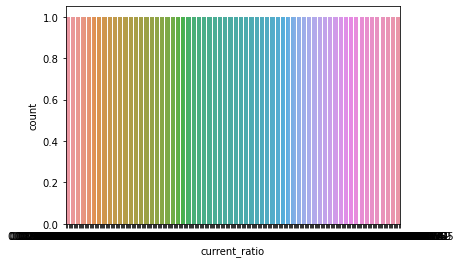

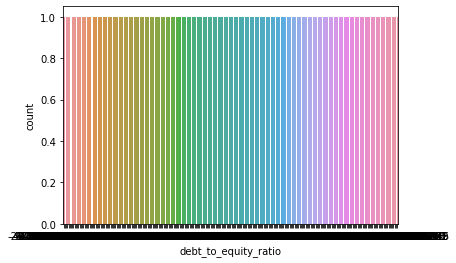

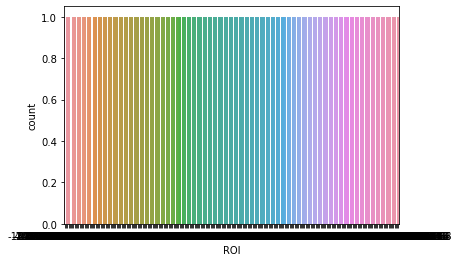

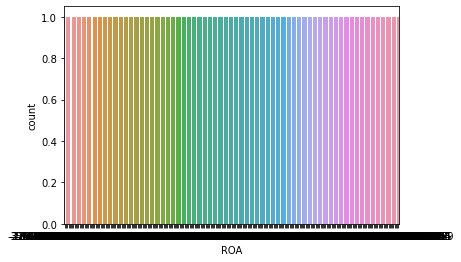

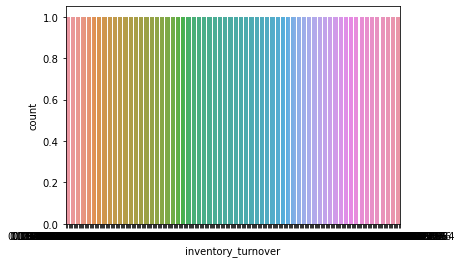

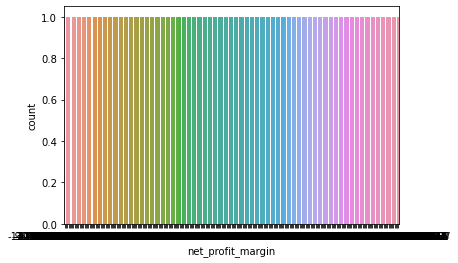

In [29]:
#Univariate EDA
for i in features:
    sns.countplot(x=i,data=df)
    plt.show()


C:\Users\hotav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


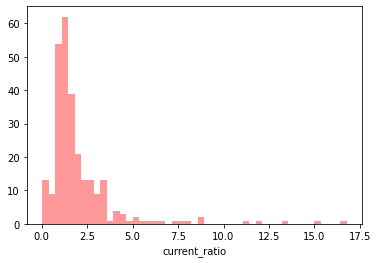

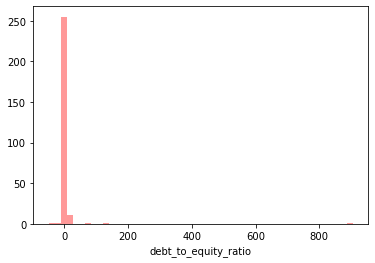

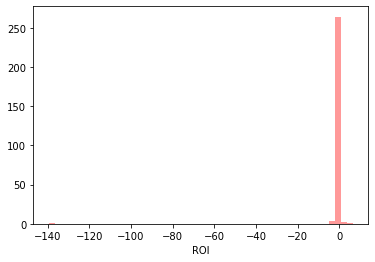

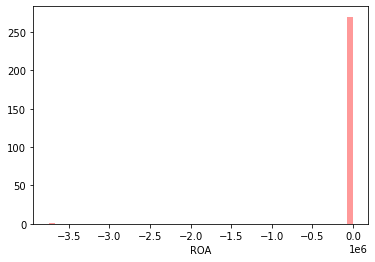

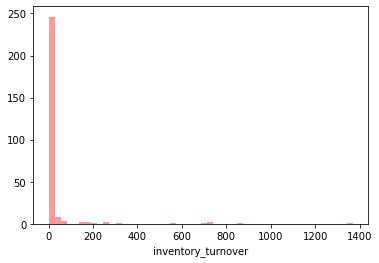

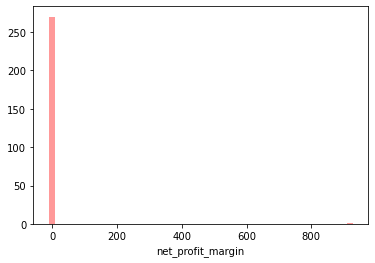

In [30]:
for i in features:
    sns.distplot(df[i],kde=False,color='r')
    plt.show()

In [ ]:
#From the EDA above,it seems that school and age doesn't seem to have any patterned effect to the grade,and the other features have effect on the grade in tandem with other variables with variations of slight differences everytime
#we will use linear regression to predict average grade

# 4. Label the data using the logic given below:
            --> A company is called in stress when its revenue to expenses ratio is less than 1.

In [57]:
df_main['Total_expense']=df['Total_operating_expenses']+df['Interest_expense']+df['Income_tax_expense']
df_main["revenue_to_expense_ratio"]=df["Total_revenue"]/df_main['Total_expense']

#1 means in stress, 0 means not in stress
df_main['stress'] = np.where(df_main['revenue_to_expense_ratio'] < 1 , 1,0)
df_main

<ipython-input-57-5bffb8f8a3d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Total_expense']=df['Total_operating_expenses']+df['Interest_expense']+df['Income_tax_expense']
<ipython-input-57-5bffb8f8a3d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["revenue_to_expense_ratio"]=df["Total_revenue"]/df_main['Total_expense']
<ipython-input-57-5bffb8f8a3d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,Symbol,current_ratio,debt_to_equity_ratio,ROI,ROA,inventory_turnover,net_profit_margin,Total_expense,revenue_to_expense_ratio,stress
0,20MICRONS,1.187858,1.363791,0.128417,0.038295,3.494956,0.045574,1607528.0,3.291950,0
1,20MICRONS,1.157742,1.411785,0.149811,0.043511,3.524510,0.051940,1585996.0,3.022943,0
2,20MICRONS,1.109648,1.613077,0.131300,0.038770,3.659932,0.044101,1421281.0,3.004999,0
5,3IINFOTECH,1.600570,3.601528,0.208069,0.079720,1369.683333,0.059951,2513700.0,4.462545,0
6,3IINFOTECH,1.485746,4.444612,0.279620,0.098478,716.797980,0.071026,2220700.0,4.463412,0
...,...,...,...,...,...,...,...,...,...,...
397,GLENMARK,1.665424,1.281683,0.148728,0.129494,1.513079,0.091875,59591440.0,1.628604,0
398,GLENMARK,2.125584,1.329791,0.138519,0.126028,1.531366,0.086564,51487160.0,1.737051,0
404,GLOBUSSPR,0.951520,0.788942,0.111556,0.029296,7.380084,0.042766,3316587.0,3.518098,0
405,GLOBUSSPR,0.870664,0.935057,0.061180,0.019260,8.570396,0.024688,2973923.0,3.315500,0


# 5. Train a machine learning classifier(Logistic regression, support vector machine, naive bays, decision tree ) to predict the classes and get the correlation of coefficients (weights) with respect to the degree of stress.

In [60]:
df=df_main.drop(['Symbol','Total_expense','revenue_to_expense_ratio'],axis=1)
df.head(10)

,current_ratio,debt_to_equity_ratio,ROI,ROA,inventory_turnover,net_profit_margin,stress
0,1.187858,1.363791,0.128417,0.038295,3.494956,0.045574,0
1,1.157742,1.411785,0.149811,0.043511,3.524510,0.051940,0
2,1.109648,1.613077,0.131300,0.038770,3.659932,0.044101,0
5,1.600570,3.601528,0.208069,0.079720,1369.683333,0.059951,0
6,1.485746,4.444612,0.279620,0.098478,716.797980,0.071026,0
8,3.271062,0.354385,0.184005,0.085776,4.070901,0.107951,0
9,2.552964,0.478413,0.255563,0.085367,4.044703,0.121478,0
10,3.044518,0.389600,0.202084,0.101562,3.940081,0.121531,0
12,1.439812,1.416136,0.216709,0.068339,4.307943,0.078291,0
13,1.327093,1.691830,0.165153,0.053886,5.057576,0.057498,0


In [61]:
x=df.drop("stress",axis=1)
y=df['stress']

In [63]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [64]:
print(xtrain.shape)
print(xtest.shape)

(216, 6)
(55, 6)


In [65]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(verbose=True)
model.fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\hotav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(verbose=True)

In [92]:
ypred=model.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [93]:
from sklearn.metrics import accuracy_score

In [95]:
print(accuracy_score(ytest,ypred))
#df.head(1)

0.9636363636363636


In [79]:
#get the correlation of coefficients (weights) with respect to the degree of stress.
print(df[['current_ratio','stress']].corr())
print(df[['debt_to_equity_ratio','stress']].corr())
print(df[['ROI','stress']].corr())
print(df[['ROA','stress']].corr())
print(df[['inventory_turnover','stress']].corr())
print(df[['net_profit_margin','stress']].corr())

               current_ratio    stress
current_ratio       1.000000 -0.114115
stress             -0.114115  1.000000
                      debt_to_equity_ratio   stress
debt_to_equity_ratio               1.00000  0.29045
stress                             0.29045  1.00000
             ROI    stress
ROI     1.000000 -0.299105
stress -0.299105  1.000000
             ROA    stress
ROA     1.000000  0.012493
stress  0.012493  1.000000
                    inventory_turnover    stress
inventory_turnover            1.000000 -0.034131
stress                       -0.034131  1.000000
                   net_profit_margin    stress
net_profit_margin           1.000000 -0.020438
stress                     -0.020438  1.000000


# 6. Use the ensemble model to predict the final degree of stress.

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(xtrain, ytrain)
ypred_ens=clf.predict(xtest)
ypred_ens
#len(ypred)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [91]:
clf.score(xtest, ytest)

0.9272727272727272

# 7.Evaluate the model on test data with evaluation matrices.


In [96]:
#Logistic regression
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.9636363636363636


In [97]:
clf.score(xtest, ytest)

0.9272727272727272

# PART B.
Forecast Cashflow for any five companies till the next 4 data points and plot the forecasted line graph with historical data also please 
explain your forecasted result using prescriptive analytics.
Note: For each part write a python code with comments in each section. Prepare a pdf document to justify each step with the model 
used and its configurations